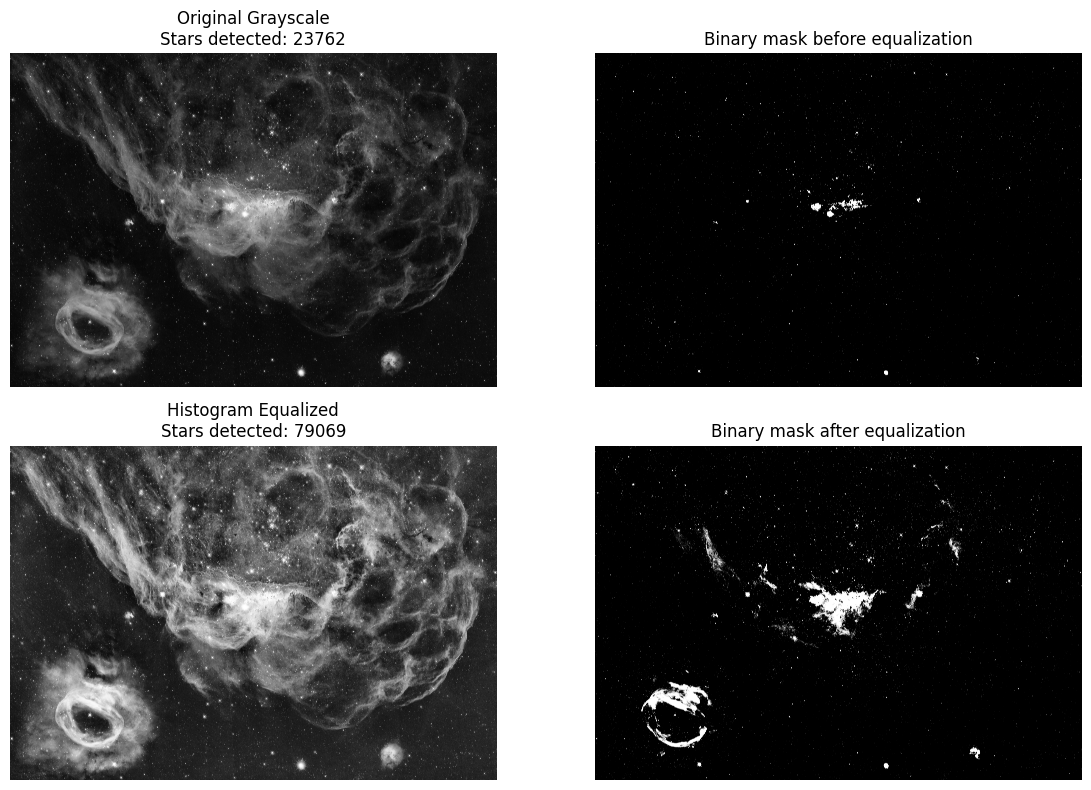

Number of stars detected before equalization: 23762
Number of stars detected after equalization: 79069


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Load restored nebula image ---
restored = cv2.imread('restored_heic2007a.jpg')
restored = cv2.cvtColor(restored, cv2.COLOR_BGR2RGB)

# --- Convert to grayscale for star detection ---
gray = cv2.cvtColor(restored, cv2.COLOR_RGB2GRAY)

# --- Function to detect stars using simple thresholding and connected components ---
def count_stars(gray_img, threshold_val):
    # Threshold the image to create binary mask
    _, binary = cv2.threshold(gray_img, threshold_val, 255, cv2.THRESH_BINARY)
    
    # Remove small noise using morphology (optional)
    kernel = np.ones((2,2), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    
    # Count connected components (each bright region = 1 star)
    num_labels, labels = cv2.connectedComponents(binary)
    
    # Subtract 1 because background is also counted
    return num_labels - 1, binary

# --- Count stars BEFORE histogram equalization ---
threshold_val_before = 200  # adjust threshold depending on brightness
num_stars_before, binary_before = count_stars(gray, threshold_val_before)

# --- Apply histogram equalization ---
# CLAHE is often better for astronomy images than global equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray_eq = clahe.apply(gray)

# --- Count stars AFTER histogram equalization ---
threshold_val_after = 200  # can keep same or adjust slightly
num_stars_after, binary_after = count_stars(gray_eq, threshold_val_after)

# --- Display results ---
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(gray, cmap='gray')
plt.title(f"Original Grayscale\nStars detected: {num_stars_before}")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(binary_before, cmap='gray')
plt.title("Binary mask before equalization")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(gray_eq, cmap='gray')
plt.title(f"Histogram Equalized\nStars detected: {num_stars_after}")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(binary_after, cmap='gray')
plt.title("Binary mask after equalization")
plt.axis('off')

plt.tight_layout()
plt.show()

# --- Print counts ---
print(f"Number of stars detected before equalization: {num_stars_before}")
print(f"Number of stars detected after equalization: {num_stars_after}")